In [2]:
import numpy as np
import matplotlib.pyplot as plt
import snorer as sn
from snorerMain import *
from kinematics import *
from geometry import *
from halo import *
from utils import equatorial_to_beta,galactic_to_beta
from constants import Constants,constant
from scipy.integrate import quad
import vegas
from numpy import pi, arccos,cos,sin

/Users/yenhsun/Documents/GitHub/snorer/src/snorer/kinematics.py:65: SyntaxWarning: invalid escape sequence '\ '
  """
/Users/yenhsun/Documents/GitHub/snorer/src/snorer/kinematics.py:239: SyntaxWarning: invalid escape sequence '\ '
  """


In [3]:
psi_vals = np.linspace(0,0.5*np.pi,100)

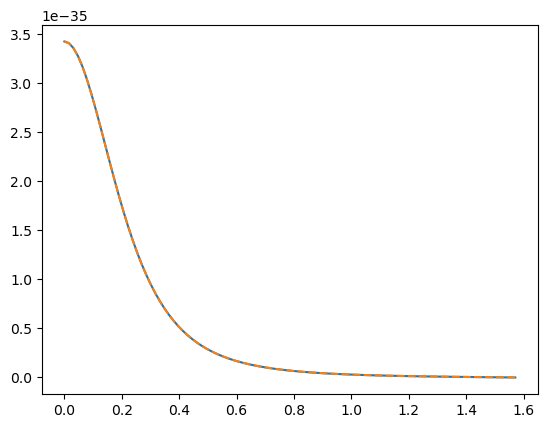

In [49]:
plt.plot(psi_vals,[sn.dsigma_xv(10,0.5,psi,1e-35) for psi in psi_vals])
plt.plot(psi_vals,[dsigma_xv(10,0.5,psi,1e-35) for psi in psi_vals],'--')

In [19]:
Ev_vals = np.logspace(-2,2,100)
D_vals = np.logspace(-2,1,100)

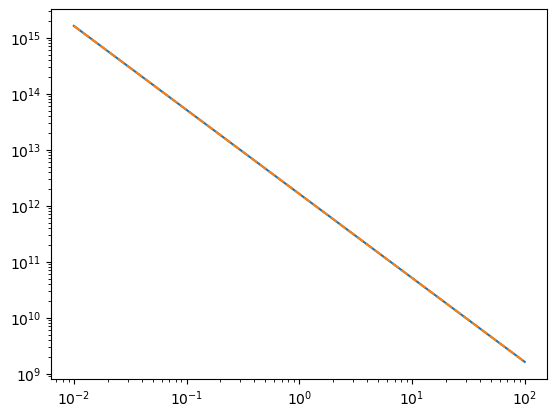

In [29]:
Ev = 5
plt.plot(Ev_vals,[sn.snNuSpectrum(Ev,D) for D in D_vals])
plt.plot(Ev_vals,snNuSpectrum(Ev,D_vals),'--')
plt.xscale('log')
plt.yscale('log')

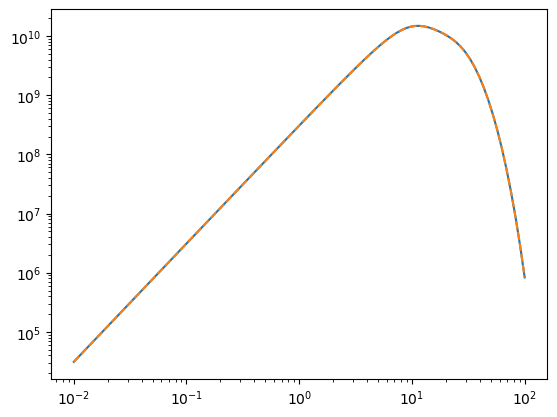

In [33]:
D = 5
plt.plot(Ev_vals,[sn.snNuSpectrum(Ev,D) for Ev in Ev_vals])
plt.plot(Ev_vals,snNuSpectrum(Ev_vals,D),'--')
plt.xscale('log')
plt.yscale('log')

In [43]:
r_vals = np.logspace(-8,2,100)


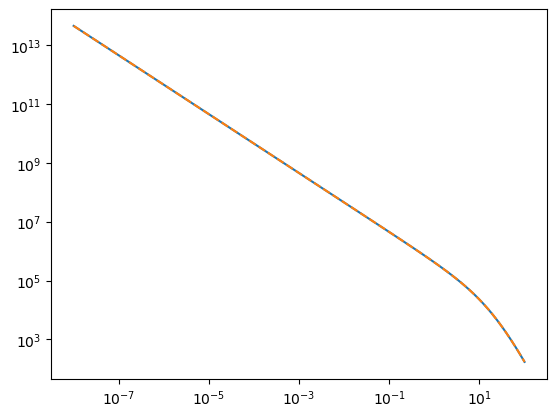

In [45]:
mx = 0.01
plt.plot(r_vals,[sn.dmNumberDensity(r,mx,is_spike=False) for r in r_vals])
plt.plot(r_vals,nx(r_vals,mx),'--')
plt.xscale('log')
plt.yscale('log')

In [3]:
import matplotlib.colors as mcolors  

In [29]:
DNvDEv.min()

0.0

/var/folders/0d/rwlphr1x0sq99kpyh_g1pw8h0000gn/T/ipykernel_44945/587206751.py:14: UserWarning: Log scale: values of z <= 0 have been masked
  contour = ax.contourf(Ev, D, DNvDEv, levels=20, cmap="viridis", norm=norm)


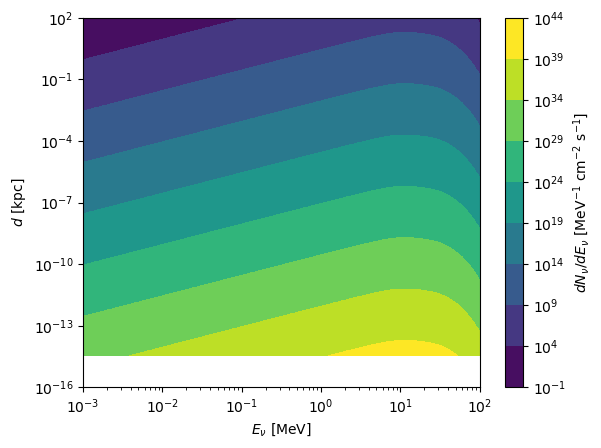

In [27]:
Ev_vals = np.logspace(-3,2,100) # Ev values
d_vals = np.logspace(-16,2,200) # d values

# Setup meshgrid for (mx,Tx) plane
Ev,D = np.meshgrid(Ev_vals,d_vals,indexing='ij')
# Evaluating tvan and convert it to years
DNvDEv = sn_nu_spectrum(Ev,D)

# Plot
fig, ax = plt.subplots()
# log-scaler color
norm = mcolors.LogNorm(vmin=DNvDEv.min()+1, vmax=DNvDEv.max())
# Contour plot
contour = ax.contourf(Ev, D, DNvDEv, levels=20, cmap="viridis", norm=norm)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$E_\nu$ [MeV]')
ax.set_ylabel(r'$d$ [kpc]')
# Color bar
cbar = fig.colorbar(contour, ax=ax)
cbar.set_label(r"$dN_\nu/dE_\nu$ [MeV$^{-1}$ cm$^{-2}$ s$^{-1}$]")
plt.savefig('dNvdEv.svg',bbox_inches='tight')

In [5]:
sn_nu_spectrum(5,1e-16)

0.0

In [7]:
f = lambda x:x**2

In [13]:
a = np.array([5,9,3,2,10,7,22])

In [15]:
np.where(a > 5, f(a), 0)

array([  0,  81,   0,   0, 100,  49, 484])

In [129]:
def galactic_to_beta(l,b,GC_coord=[0,0]):
    """
    Transform galactic coordinate to off-center angle beta

    Parameters
    ----------
    l : array_like
        Galactic longitude, rad
    b : array_like
        Galactic latitude, rad
    GC_coord : list
        Galactic coordinate for galactic center [lg,bg].
        Default is Milky Way center [lg,bg] = [0,0]

    Returns
    -------
    out : scalar/ndarray
        Off-center angle beta. The result is scalar if all
        inputs are scalars.
    """
    lg,bg = GC_coord
    l,b = np.asarray((l,b))
    beta = np.cos(b) * np.cos(bg) * np.cos(l - lg) + np.sin(b) * np.sin(bg)
    return beta

In [131]:
galactic_to_beta([5,7],[6,4])

array([ 0.272364 , -0.4927834])

In [77]:
galactic_to_beta(5,6)

0.27236400192809523

In [87]:
from astropy.coordinates import SkyCoord

In [133]:
def equatorial_to_beta(ra,dec,GC_coord=None):
    """
    Transform equatorial coordinate to off-center angle and
    galactic coordinate (beta,l,b)

    Parameters
    ----------
    ra : array_like
        Right ascension.
    dec : array_like
        Declination.
    GC_coord : None or list of shape (2,)
        The equatorial coordinate for galactic center.
        Default is None, which implements the center of our
        Milky Way. For a specific GC coordinate, it should
        have GC_coord = [RA,DEC] where both elements are
        string type that expressed in ICRS J2000.0.

    Returns
    -------
    out : tuple
        Tuple of (beta,l,b). Each component is scalar if all
        inputs are scalars
    """
    # Galactic coordinate for GC
    if GC_coord is not None:
        ra_g, dec_g = GC_coord
        gc_coord = SkyCoord(ra = ra_g,dec = dec_g)
        lg = gc_coord.galactic.l.radian
        bg = gc_coord.galactic.b.radian
    else:
        lg,bg = 0,0
    # Galactic coordinate for SN
    eq_coords = SkyCoord(ra = ra,dec = dec)
    # Get galactic coordinate
    l,b = eq_coords.galactic.l.radian,eq_coords.galactic.b.radian
    beta = galactic_to_beta(l,b,GC_coord = [lg,bg])
    return beta,l,b

In [91]:
ra_list = ["12h30m15s", "15h45m50s", "18h20m33s"]
dec_list = ["-45d15m20s", "20d30m10s", "5d10m5s"]

In [135]:
equatorial_to_beta(ra_list,dec_list)

(array([0.46285836, 0.54081715, 0.81791522]),
 array([5.21898271, 0.57851925, 0.59417015]),
 array([0.30465472, 0.86855972, 0.16086497]))

In [109]:
equatorial_to_beta("10h20m30s","-30d40m50s")

(-0.026282075084575033, 4.684062960094634, 0.38187850271567825)

In [139]:
equatorial_to_beta(ra_list,dec_list,GC_coord=6)

TypeError: cannot unpack non-iterable int object

In [115]:
from snorer import constant

In [10]:
sn.constant.MW_profile

{'rhos': 184, 'rs': 24.42, 'n': 2, 'mBH': 4290000.0, 'rh': 0.002}

In [4]:
class BoostedDarkMatter(Constants):
    """
    Superclass: Constants
    
    Class with medoths that evaluate SNv BDM coming from supernova in arbitrary distant
    galaxy with DM-v and DM-e interaction cross sections descrbied by a specific particle
    model.

    /*-----------------------------------------------------------------------------*/

    ********************
    *                  *
    *   Class Inputs   *
    *                  *
    ********************
    
            Rs: Distance from Earth to SN, kpc
            Rg: Distance from Earth to the center of a distant galaxy, kpc
       amp2_xv: Func type, amplitude squared for DM-v interaction, 4 positioning
                arguments.
                amp2_xv := some_func(s,t,u,mx): the first 3 are Mandelstam variables
                and the last one is the DM mass.
       amp2_xe: Identical to amp2_xv, but is for DM-e interaction
      **kwargs: Keyword arguments that will be used to determine halo profile. Leave them
                blank will use Milky Way profile without spike by default. These arguments
                are rhos, rs, n, is_spike, mBH, tBH, rh, sigv, 'alpha', The last five
                parameters are related to halo with spike and only work when
                is_spike = True.


    ********************
    *                  *
    *    Attributes    *
    *                  *
    ********************

    Suppose, we want to know the SN1987a in LMC, we can extract the equatorial coordinates
    by constant.LMC_coord and constant.SN1987a_coord. They documents [RA,DEC,dist] of the
    stellar objects. One can further use 'snorer.equatorial_to_beta' to get the off-cetner
    angle beta. Thus, we have

    >>> Rs, Rg, beta = 49.97, 51.4, 0.02004
    >>> sn1987a = snorer.BoostedDarkMatter(Rs,Rg,beta,amp2_xv,amp2_xe)

    When an instance is initialized, it also automatically assigns DM halo profile. 
    
    /*---------------------------Constructing Amplitudes---------------------------*/
    
    We take the model discussed in Phys. Rev. D 108, 083013 (2023) for instance. Both
    DM-v and DM-e have the same amplitude square show by Eq. (3) in terms of Mandelstam
    variables (s,t,u),

        M^2 = 2 (Q/t - mV^2)^2 (s^2 + u^2 + 4t (m1^2 + m2^2) - 2 (m1^2 + m2^2)^2)

    where Q is the multiplication of coupling constants, m1 and m2 are the masses of
    incident and target particles respectively and mV the mediator mass.

    Thus we can construct DM-v amplitude square by letting, m1 = 0 and assume mV = mx/3,
    gV = 1e-06, gx = 1e-02,

    def amp2_xv(s,t,u,mx) -> float:
        mV = mx/3
        gV,gx = 1e-06,1e-02
        Q = gV*gx
        return (s**2 + u**2 + 4*t*(mx**2) - 2*(mx**2)**2)*(Q/(t - mV**2))**2

    Similarily, for DM-e scattering, m1 = mx, m2 = me and kinetic mixing eps = 1e-06

    def amp2_xe(s,t,u,mx) -> float:
        mV = mx/3
        me = constant.me
        gx,eps = 1e-02,1e-06
        Q = gx*eps
        return 2*(s**2 + u**2 + 4*t*(me**2 + mx**2) - 2*(me**2 + mx**2)**2)*(Q/(t - mV**2))**2

    These are the desired amplitudes and serve as the inputs in the class.


    ********************
    *                  *
    *     Methods      *
    *                  *
    ********************

    This class has the following methods

                nx(r,mx): Yields DM number density at place distant r to GC, 1/cm^3
         sigma_xe(Tx,mx): Yields total DM-e cross section for a given (Tx,mx), cm^2
    dsigma_xv(Tx,mx,psi): Yields differential DM-v cross section at given (Tx,mx,psi), cm^2/sr
           flux(t,Tx,mx): Yields SNv BDM flux at Earth given (t,Tx,mx), #/MeV/cm^2/s
               event(mx): Yields SNv BDM event in a given period at Earth given mx, # per electron

    The cross sections are easy to understand as they are generated by the amplitude-squared inputed
    by the user.

    >>> snv1987a.sigma_xe(Tx=15,mx=1e-3)             # cm^2
    3.5462696696305866e-36
    >>> snv1987a.dsigma_xv(Tx=15,mx=1e-3,psi=0.01)   # cm^2/sr
    1.541723841734109e-33

    To generate SNv BDM flux at Earth, the 'flux' method requires the a particular time t in seconds,
    BDM kinetic energy Tx in MeV and DM mass mx in MeV. Other optional keyword arguments can be
    checked via the associated docstring.

    >>>snv1987a.flux(t=100,Tx=15,mx=1e-3)            # 1/cm^2/MeV/s
    2.4216253535745897e-09

    For BDM event
    
    >>>snv1987a.event(mx=1e-3,neval=50000)           # BDM event number per electron
    1.1068108958437556e-32
    
    Note that to convert event into a real case, we have to multiply the total electron number in the
    detector. For Super-Kamionkande, its total electron number is about 7.4e+33. Thus the total event
    before its vanishing, SK can accumulate around 7.34e+33*1.1068e-32 ~ 81 event before SNv BDM
    vanished.
    """
    def __init__(self,Rs,Rg,beta,amp2_xv,amp2_xe,**kwargs): 
        self.Rs = Rs
        self.Rg = Rg
        self.beta = beta
        self.amp2_xv = amp2_xv
        self.amp2_xe = amp2_xe

        # Default arguments for halo profile
        default_attributes = {
            'is_spike': False,
            'rhos': 184,
            'rs': 24.42,
            'n': 2,
            'mBH': 4290000.0,
            'tBH':1e10,
            'rh': 0.002,
            'alpha': '3/2',
            'sigv': None,
        }

        # Update default_attributes if 
        default_attributes.update(kwargs)

        # Convert into class attributes
        for key, value in default_attributes.items():
            setattr(self, key, value)

        # Setup internal function _nx for DM number density calculation
        if self.is_spike is True:  # turn on spike
            self._nxsp = HaloSpike(self.mBH,self.tBH,self.alpha)
            self._nx = lambda r,mx: self._nxsp(r,mx,self.sigv,self.rhos,self.rs,self.n)
        elif self.is_spike is False:  # turn off spike
            self._nx = lambda r,mx: rhox(r,self.rhos,self.rs,self.n)/mx
        else:
            raise FlagError('Argument \'is_spike\' must be a bool.')
        
    def nx(self,r,mx) -> float:
        """
        DM number density
        """
        return self._nx(r,mx)
    
    def sigma_xe(self,Tx,mx) -> float:
        """Obtain total sigma_xe for a given (Tx,mx), cm^2"""
        me = self.me
        Ex = Tx + mx                             # Total BDM energy, kinetic + mass
        s = 2*me*Ex + mx**2 + me**2
        p_squared = (s - (me+mx)**2)*(s-(me-mx)**2)/4/s
        t_min,t_max = get_tBound(Tx,mx,me) # Allowed t range for dsigma/dt integration
        sigma = quad(lambda t: self.amp2_xe(s,t,2*(mx**2+me**2)-s-t,mx),t_min,t_max)[0]
        sigma = sigma/32/s/p_squared             # integration over azimuthal angle 2pi is incoporated
        sigma = sigma*self.perMeV2cm**2          # convert 1/MeV^2 to cm^2
        return sigma

    def dsigma_xv(self,Tx,mx,psi) -> float:
        """Obtain diff sigma_xv for a given (Tx,mx,psi), cm^2"""
        varMandelstam = Mandelstam(Tx,0,mx,psi)  # Get the Mandelstam variables and dLips at psi for (Tx,mx,psi)
        s,t,u,dLips = varMandelstam.s,varMandelstam.t,varMandelstam.u,varMandelstam.dLips
        sigma = self.amp2_xv(s,t,u,mx)*dLips     # Evaluate the differential cross section at psi
        sigma = sigma*self.perMeV2cm**2          # convert 1/MeV^2 to cm^2
        return sigma
            
    def _emissivity_jx(self,Tx,Ev,dEv,mx,d,r,psi,d_cut=3.24e-15) -> float:
        """
        Emissivity jx of supernova-neutrino-boost dark matter at boost point.
    
        Parameters
        ----------
        Tx : float
            BDM kinetic energy, MeV.
        Ev : float
            The supernova neutrino energy, MeV.
        dEv : float
            The Jacobian (dEv/dTx)*(vx/c) that converts per netrino energy width, dEv,
            to per BDM kinetic energy width, dTx.
        mx : float
            Dark matter mass, MeV.
        d : float
            Distance from supernova to boost point, kpc.
        r : float
            Distance from galactic center to boost point, kpc.
        psi : float
            The scattering angle in lab frame at boost point, rad. 
        d_cut: scalar
            Terminating point for d. Below the value will return 0.
            Default is 3.24e-15 kpc, approximating 100 km, the size of neutrino sphere.

        Returns
        -------
        out : scalar
            BDM emissivity at boost point along the direction psi, 1/MeV/cm^3/s/sr
    
        See Eq. (13) in BDM Physics for detail.
        """
        # Mutiplied by 10 is becasue we assume total energy released in 10 seconds
        # thus L_tot = E_tot/10. Given we integrate all the contribution within neutrino
        # shell, we should multply it back. See BDM Physics for discussion.
        dfv = 10*sn_nu_spectrum(Ev,d,d_cut,is_density=False)   # SNv flux
        dsigma = self.dsigma_xv(Tx,mx,psi)   # DM-v diff. cross section, cm^2/sr
        ndx = self.nx(r,mx) # DM number density
        # Evaluate BDM emissivity
        return ndx * dfv * dsigma * dEv

    def _differential_flux(self,t,Tx,mx,theta,phi,d_cut=3.24e-15,r_cut=1e-8) -> float:
        """
        The differential supernova-neutrin-boosted dark matter flux at Earth at specific time t 
        and angular direction (theta,phi).
        
        Parameters
        ----------
        t : float
            Time t, relative to the SN neutrino's arrival.
        Tx : float
            BDM kinetic energy, MeV.
        mx : float
            DM mass, MeV.
        theta : float
            The zenith angle theta, rad.
        phi : float
            The azimuthal angle that centers SN, rad.
        d_cut : scalar
            Terminating point for d. Below the value will return 0.
            Default is 3.24e-15 kpc, approximating 100 km, the size of neutrino sphere.
        r_cut : float
            Terminating nx when r' < r_cut, kpc. If one needs to incorporate dark matter spike
            in the central region, r_cut cannot be too large. Otherwise, the spike effect will
            be chopped off before it has any noticeble consequence. Default is 1e-8 kpc.
        
        Returns
        -------
        out : scalar
            The differential BDM flux at Earth, 1/MeV/cm^2/s/sr
    
        See the integrand of Eq. (18) in BDM Physics.
        """
        Rs,Rg,beta = self.Rs,self.Rg,self.beta
        # Dimensionless BDM velocity, vx/c
        vx = get_vx(Tx,mx)
        
        # Initializing Propagation class to account time-dependency
        # in propagation geometry
        bdmProgagation = Propagation(t,vx,theta,phi,Rs,Rg,beta)
        l = bdmProgagation.l  # l.o.s, to evaluate Jacobian J
        d = bdmProgagation.d  # Distance from SN to B, to evaluate neutrino flux
        r = bdmProgagation.rprime  # Distance from GC to B, to evaluate nx
        psi = arccos(bdmProgagation.cos_psi)  # Scattering angle that points Earth direction

        # bdmGeometry = sn.Geometry(t,theta,phi,vx,Rs,Rg,beta)
        # l = bdmGeometry.d
        # d = bdmGeometry.D 
        # r = bdmGeometry.rprime
        # psi = arccos(bdmGeometry.cosPsi)
        
        # Initializing Neutrino class to get required SNv properties
        snNu = Neutrino(Tx,mx,psi)
        Ev = snNu.Ev  # required SNv energy
        dEv = snNu.dEv * vx  # the Jacobian (dEv/dTx)*(vx/c)
        sanity = snNu.sanity  # is this scattring process allowed?

        # Evaluate differential flux, integrand of Eq. (18) in BDM Physics
        if sanity and r > r_cut: # if energy conservation holds
            # Evaluate the BDM emissivity
            jx = self._emissivity_jx(Tx,Ev,dEv,mx,d,r,psi,d_cut)
            # # Jacobian, it should not diverge as we already require d > d_trunct
            J = d * vx / (vx * (l - Rs * cos(theta)) + d) * constant.c
            # Differential flux 
            diff_flux = J * jx * sin(theta)
        else:
            diff_flux = 0
        return diff_flux
        
    def flux(self,t,Tx,mx,d_cut=3.24e-15,r_cut=1e-8,nitn=10,neval=30000) -> float:
        """
        The supernova-neutrino-boosted dark matter flux at time t on Earth after integrated over
        a field-of-view dOmega. Note that zenith angle theta is integrated up to thetaMax
        and azimuthal angle phi from 0 to 2pi.
    
        Parameters
        ----------
        t : float
            The BDM ToF, relative to the first SN neutrino's arrival
        Tx : float
            BDM kinetic energy, MeV
        mx : float
            DM mass, MeV
        d_cut: scalar
            Terminating point for d. Below the value will return 0.
            Default is 3.24e-15 kpc, approximating 100 km, the size of neutrino sphere.
        r_cut : float
            Terminating nx when r' < r_cut, kpc. If one needs to incorporate dark matter spike
            in the central region, r_cut cannot be too large. Otherwise, the spike effect will
            be chopped off before it has any noticeble consequence. Default is 1e-8 kpc.
        nitn : int
            Number of chains for vegas to evaluate the integral. Default is 10.
        neval : int
            Number of evaluation number in each chain in vegas. Default is 30000.
        
        Returns
        -------
        out : scalar
            The time-depenent boosted dark matter flux at Earth, 1/MeV/cm^2/s
    
        See Eq. (18) in BDM Physics 
        """     
        Rs = self.Rs
        def diff_flux(x):
            """
            The integrand in (18) with only theta and phi are left as inputs.
            Note that theta = x[0] and phi = x[1]. This matches the vegas
            inputs.
            """
            theta, phi = x
            df = self._differential_flux(t=t,Tx=Tx,mx=mx,theta=theta,phi=phi,d_cut=d_cut,r_cut=r_cut)
            return df
        
        # Get vanishing time
        _,t_van = _get_tof(Tx,mx,Rs)
        # Evaluate flux
        if t <= t_van:
            theta_max = get_thetaMax(t,Tx,mx,Rs)  # get the thetaMax
            integ = vegas.Integrator([[0,theta_max],[0,2*pi]])  # (theta,phi)
            flux = integ(diff_flux,nitn=nitn,neval=neval).mean
            return flux
        else:
           # t > t_van will yield zero BDM
           return 0.0
    
    def event(self,mx,Tx_range=[5,30],t_range=[10,35*constant.year2Seconds],d_cut=3.24e-15,r_cut=1e-8,nitn=10,neval=30000) -> float:
        """
        The supernova-neutrino-boosted dark matter evnet per electron. To retrieve the correct
        event number, one should mutiply the total electron number Ne.

        For instance, if the BDM event rate obtained from this function is Nx0, then the total
        BDM event in a detector with electron number is

            Nx = Ne * Nx0
    
        Parameters
        ----------
        mx : float
            DM mass, MeV
        Tx_range : list
            Integration range for BDM kinetic energy [Tx_min,Tx_max], MeV
        t_range : list
            Integration range for exposure time [t_min,t_max], seconds
        d_cut: scalar
            Terminating point for d. Below the value will return 0.
            Default is 3.24e-15 kpc, approximating 100 km, the size of
            neutrino sphere.
        r_cut : float
            Terminating nx when r' < r_cut, kpc. If one needs to incorporate dark matter spike
            in the central region, r_cut cannot be too large. Otherwise, the spike effect will
            be chopped off before it has any noticeble consequence. Default is 1e-8 kpc.
        
        Returns
        -------
        out : scalar
            Event number of supernova-neutrino-boosted dark matter per electron.
        """
        Rs = self.Rs
        def diff_event(x):
            """
            The integrand in (18) with t, Tx, theta and phi are left as inputs.
            Note that t = x[0], Tx = [1], theta = x[2] and phi = x[3]. This
            matches the vegas inputs.
            """
            t, Tx, theta, phi = x
            df = self._differential_flux(t=t,Tx=Tx,mx=mx,theta=theta,phi=phi,d_cut=d_cut,r_cut=r_cut)
            return df * self.sigma_xe(Tx,mx)

        # Integration range for Tx
        Tx_min,Tx_max = Tx_range
        # Integration range for t
        t_min,t_max = t_range
        
        _,t_van = _get_tof(Tx_min,mx,Rs)   # get vanishing time
        theta_max = get_thetaMax(t_min,Tx_min,mx,Rs)   # get the thetaMax
        
        if t_van <= t_max: # check if user-input maximum exposure time t_max is smaller than the vanishing time
            t_max = t_van  # if so, reset t_max as t_van
        
        if t_min < t_max:  # sometimes the user-input beginning time could be larger than the vanishing time if DM mass is very light 
            integ = vegas.Integrator([[t_min,t_max],[Tx_min,Tx_max],[0,theta_max],[0,2*pi]])  #(t,Tx,theta,phi)
            event = integ(diff_event,nitn=nitn,neval=neval).mean
            return event
        else:
            return 0.0

In [6]:
def amp2_xv(s,t,u,mx) -> float:
    mV = mx/3
    gV,gx = 1e-06,1e-02
    Q = gV*gx
    return (s**2 + u**2 + 4*t*(mx**2) - 2*(mx**2)**2)*(Q/(t - mV**2))**2


def amp2_xe(s,t,u,mx) -> float:
    mV = mx/3
    me = constant.me
    gx,eps = 1e-02,1e-06
    Q = gx*eps
    return 2*(s**2 + u**2 + 4*t*(me**2 + mx**2) - 2*(me**2 + mx**2)**2)*(Q/(t - mV**2))**2

In [ ]:
 >>> snv1987a.sigma_xe(Tx=15,mx=1e-3)             # cm^2
    3.5462696696305866e-36
    >>> snv1987a.dsigma_xv(Tx=15,mx=1e-3,psi=0.01)   # cm^2/sr
    1.541723841734109e-33

In [72]:
constant.LMC_profile

{'rhos': 68, 'rs': 31.9, 'n': 3, 'mBH': 1000000.0, 'rh': 0.00084}

In [8]:
bdm=BoostedDarkMatter(51.4,49.97,0.02004146106281527,amp2_xv,amp2_xe)

In [ ]:
>>>snv1987a.flux(t=100,Tx=15,mx=1e-3)            # 1/cm^2/MeV/s
    2.4216253535745897e-09

    For BDM event
    
    >>>snv1987a.event(mx=1e-3,neval=50000)           # BDM event number per electron
    1.1068108958437556e-32

In [10]:
bdm.event(mx=1e-3)  

1.0395420186294413e-32

In [287]:
genbdm._diff_flux(1172.4150390625,15,1e-3,0.001,0,10)

4.642337159582794e-08

In [246]:
bdm.sigma_xe(Tx=0.035,mx=1e-3),genbdm.sigma_xe(Tx=0.035,mx=1e-3)

(1.131110565294711e-32, 1.131110565294711e-32)

In [78]:
from numpy import sin

In [3]:
equatorial_to_beta('05h35m27.8733s', '-69d16m10.478s',GC_coord=['05h23m34.5264s', '-69d45m22.053s'])

(0.02004146106281527, 4.881742952741849, -0.5574110666264904)

In [144]:
from snorer.utils import GeneralInterface

In [31]:
genbdm = GeneralInterface(constant.SN1987a_coord,constant.LMC_coord,amp2_xv,amp2_xe)

In [214]:
0.02004146106281527*180/np.pi

1.1482911341750883

In [33]:
genbdm.flux(t=1172.4150390625,Tx=15,mx=1e-2)

2.1168529620917027e-12

In [34]:
bdm.flux(t=1172.4150390625,Tx=15,mx=1e-2)

2.1165210533003018e-12

In [232]:
constant.LMC_coord

['05h23m34.5264s', '-69d45m22.053s', 49.97]

In [175]:
sn.get_thetaRange(10,Tx=15,mx=1e-3,Rstar=51.4)

(0, 0.019997333784084016)

In [248]:
sn.get_tof(Tx=15,mx=1e-3,Rstar=51.4)

(11752.4150390625, 88154140.4074291)

In [183]:
sn.get_thetaRange(264458013.77296084,Tx=5,mx=1e-3,Rstar=51.4)

(0.009997659096440088, 0.009997665614147657)

In [275]:
sn.get_thetaRange(11752.4150390625,Tx=15,mx=1e-3,Rstar=51.4)

(0, 0.01154610736296491)

In [189]:
sn.get_thetaRange?

Signature: sn.get_thetaRange(t, Tx, mx, Rstar) -> tuple
Docstring:
Find the range of zenith angle theta that yields non-zero SNv BDM flux 

Input
------
t: the BDM ToF, if t > t_van, the result is unphysical
Tx: DM kinetic energy, MeV
mx: DM mass, MeV
Rstar: Distance between Earth and SN, in kpc

Output
------
tup: (theta_min,thata_max), rad
File:      /opt/anaconda3/lib/python3.12/site-packages/snorer/kinematics.py
Type:      function

In [193]:
get_thetaMax?

Signature: get_thetaMax(t, Tx, mx, Rstar) -> float
Docstring:
Find the maximum BDM field-of-view that centers SN at particular time t

Input
------
t : scalar
    The BDM at particular time t, seconds. If t > t_van, the result is
    unphysical
Tx : scalar 
    BDM kinetic energy, MeV
mx : scalar
    DM mass, MeV
Rs : scalar
    Distance to supernova, kpc

Returns
-------
out : scalar
    Maximum field-of-view centers supernova, theta_MAX, rad

See Eq. (24) in "User Manual/Physics Overview" for detail.
File:      ~/Documents/GitHub/snorer/src/snorer/kinematics.py
Type:      function

In [29]:
from snorer.utils import GeneralInterface

In [81]:
5< 2*1

False

In [105]:
constant.SN1987a_coord

['05h35m27.8733s', '-69d16m10.478s', 51.4]

In [143]:
class GeneralInterface2(Constants):
    """
    Superclass: Constants
    
    Class with medoths that evaluate SNv BDM coming from SN in arbitrary distant galaxy
    with DM-v and DM-e interaction cross sections descrbied by a specific particle model.
    This class has an dependency on Astropy for handling SN/GC coordinates expressed in
    ICRS J2000.0 system.


    /*-----------------------------------------------------------------------------*/

    ********************
    *                  *
    *   Class Inputs   *
    *                  *
    ********************
    
    SN_coord: SN coordinate list, [RA,DEC,dist]: the first two are right ascension
              and declination of the celestial object respectively, both in string
              type. The last one is the distance to the object in kpc
    GC_coord: Identical to SN_coord, but is for the galactic center
     amp2_xv: Func type, amplitude squared for DM-v interaction, 4 positioning
              arguments.
              amp2_xv := some_func(s,t,u,mx): the first 3 are Mandelstam variables
              and the last one is the DM mass.
     amp2_xe: Identical to amp2_xv, but is for DM-e interaction
    **kwargs: Keyword arguments that will be passed to dmNumberDensity(), see the
              following explanation


    /*-------------------------------IMPORTANT NOTE--------------------------------*/

    The first FOUR inputs are POSITIONING-ONLY arguments, so their ORDER matters.


    ********************
    *                  *
    *    Attributes    *
    *                  *
    ********************

    When an instance is initialized, the following attributes will be assigned,

            Rstar: Distance to SN, kpc
               Re: Distance to GC, kpc
             beta: Off-center angle, rad
    separation_3d: Separation distance between the two celestial objects, kpc
    
    None of these attributes can be reassigned manually as they are completely
    determined when SN_coord and GC_coord are specified. If you want to have different
    attributes, you can only do by updating SN_coord/GC_coord.

    Suppose, we want to know the SN1987a in LMC, we already documented the coordinates
    of these two in constant, thus

    >>> SN_coord = constant.SN1987a_coord
    >>> GC_coord = constant.LMC_coord
    >>> sn1987a = snoreGeneralInterface(SN_coord,GC_coord,amp2_xv,amp2_xe)

    We explain the amplitude-square later. Now we can view the intrinsic properties
    of this instance by

    >>> sn1987a
          Dist to GC: 4.997e+01 kpc
          Dist to SN: 5.170e+01 kpc
     Seperation dist: 2.008e+00 kpc
    Off-center angle: 2.004e-02 rad

    They can be retrieved by, eg.,
    
    >>> sn1987a.beta     # off-center angle
    0.02004146106280973


    /*------------------------SNv Spectrum and DM Profile--------------------------*/

    When an instance is initialized, it also automatically assigns a SNv spectrum and
    a DM halo profile by snNuSpectrum() and dmNumberDensity().

    Note that SNv spectrum will have flux unit and DM spike is turn off by default in
    the halo profile. Legal keyword arguments in dmNumberDensity() can be passed by
    **kwargs durning instance's initialization.

    The associated SNv flux can be viewed by, eg. Ev = 15 MeV and D = 10 kpc
    
    >>> sn1987a.snNuFlux(Ev=15,D=10)      # MeV, kpc
    3351680277.5754733

    For the DM number density, if you passed keyword arguments durning the initialization
    such as: (is_spike=True, sigv=3, tBH=1e9, mBH=1e8, rhos=107, rs=33.9), then it is
    equivalent to have the DM number density

    dmNumberDensity(r,mx,is_spike=True,sigv=3,tBH=1e9,mBH=1e8,rhos=107,rs=33.9)

    Only those keyword arguments contained in dmNumberDensity() will be accepted or
    exception will be raised.

    Given these, we can viewed the DM number density in this instance by

    >>> sn1987a.nx(r=5,mx=1e-2)
    55092.31392649719

    You can compare the result with dmNumberDensity by having

    >>> dmNumberDensity(5,1e-2,is_spike=True,sigv=3,tBH=1e9,mBH=1e8,rhos=107,rs=33.9)
    55092.31392649719

    The two matched as expected!

    The keyword arguments are stored in __dict__, you may update the value(s) or added
    new keys by

    >>> sn1987a.tBH=5e8

    However, adding non-existent key(s) will trigger error during the calculation.
    

    /*---------------------------Constructing Amplitudes---------------------------*/
    
    We take the model discussed in Phys. Rev. D 108, 083013 (2023) for instance. Both
    DM-v and DM-e have the same amplitude square show by Eq. (3) in terms of Mandelstam
    variables (s,t,u),

        M^2 = 2 (Q/t - mV^2)^2 (s^2 + u^2 + 4t (m1^2 + m2^2) - 2 (m1^2 + m2^2)^2)

    where Q is the multiplication of coupling constants, m1 and m2 are the masses of
    incident and target particles respectively and mV the mediator mass.

    Thus we can construct DM-v amplitude square by letting, m1 = 0 and assume mV = mx/3,
    gV = 1e-06, gx = 1e-02,

    def amp2_xv(s,t,u,mx) -> float:
        mV = mx/3
        gV,gx = 1e-06,1e-02
        Q = gV*gx
        return (s**2 + u**2 + 4*t*(mx**2) - 2*(mx**2)**2)*(Q/(t - mV**2))**2

    Similarily, for DM-e scattering, m1 = mx, m2 = me and kinetic mixing eps = 1e-06

    def amp2_xe(s,t,u,mx) -> float:
        mV = mx/3
        me = constant.me
        gx,eps = 1e-02,1e-06
        Q = gx*eps
        return 2*(s**2 + u**2 + 4*t*(me**2 + mx**2) - 2*(me**2 + mx**2)**2)*(Q/(t - mV**2))**2

    These are the desired amplitudes and serve as the inputs in the class.


    ********************
    *                  *
    *     Methods      *
    *                  *
    ********************

    This class has the following methods

          snNuFlux(Ev,D): SNv flux after propagating D, 1/cm^2/MeV/s
                nx(r,mx): DM number density at place distant r to GC, 1/cm^3
         sigma_xe(Tx,mx): Yields the total DM-e cross section for a given (Tx,mx), cm^2
    dsigma_xv(Tx,mx,psi): Yields the differential DM-v cross section at given (Tx,mx,psi), cm^2/sr
           flux(t,Tx,mx): Yields the SNv BDM flux at Earth given (t,Tx,mx), #/MeV/cm^2/s
               event(mx): Yields the SNv BDM event in a given period at Earth given mx, # per electron

    The cross section parts are easy to understand as they are generated by the amplitude-squares
    inputed by user.

    >>> snv1987a.sigma_xe(Tx=15,mx=1e-3)             # cm^2
    3.5462696696305866e-36
    >>> snv1987a.dsigma_xv(Tx=15,mx=1e-3,psi=0.01)   # cm^2/sr
    1.541723841734109e-33

    To generate SNv BDM flux at Earth, the `flux` method requires the BDM ToF t in seconds, BDM
    kinetic energy Tx in MeV and DM mass mx in MeV. Other optional keyword arguments can be checked
    via the associated docstring.

    >>>snv1987a.flux(t=100,Tx=15,mx=1e-3)            # 1/cm^2/MeV/s
    2.4216253535745897e-09

    For BDM event
    
    >>>snv1987a.event(mx=1e-3,neval=50000)           # BDM event number per electron
    1.1068108958437556e-32
    
    Note that to convert event into a real case, we have to multiply the total electron number in the
    detector. For Super-Kamionkande, its total electron number is about 7.4e+33. Thus the total event
    before its vanishing, SK can accumulate around 7.34e+33*1.1068e-32 ~ 81.2 events before SNv BDM
    vanished.

    There is one addiitonal class method that can be called without initialization of the instance.
    This method can assist user to get the off-center angle beta and separation distance between the
    two celestial objects.
    
    get_geometry_3d(SN_coord,GC_coord)

    The inputs SN_coord and CG_coord are explained previously. The outputs are beta, rad, and separation
    distance, kpc.
    """
    def __init__(self,Rs,Rg,beta,amp2_xv,amp2_xe): 
        self.Rs = Rs
        self.Rg = Rg
        self.beta = beta
        self.amp2_xv = amp2_xv
        self.amp2_xe = amp2_xe
                
    def nx(self,r,mx) -> float:
        return sn.dmNumberDensity(r,mx)
    
    def snNuFlux(self,Ev,D) -> float:
        return sn.snNuSpectrum(Ev,D)
    
    def sigma_xe(self,Tx,mx) -> float:
        """Obtain total sigma_xe for a given (Tx,mx), cm^2"""
        me = self.me
        Ex = Tx + mx                             # Total BDM energy, kinetic + mass
        s = 2*me*Ex + mx**2 + me**2
        p_squared = (s - (me+mx)**2)*(s-(me-mx)**2)/4/s
        t_min,t_max = sn.get_tBound(mx,me,Tx) # Allowed t range for dsigma/dt integration
        sigma = quad(lambda t: self.amp2_xe(s,t,2*(mx**2+me**2)-s-t,mx),t_min,t_max)[0]
        sigma = sigma/32/s/p_squared             # integration over azimuthal angle 2pi is incoporated
        sigma = sigma*self.perMeV2cm**2          # convert 1/MeV^2 to cm^2
        return sigma

    def dsigma_xv(self,Tx,mx,psi) -> float:
        """Obtain diff sigma_xv for a given (Tx,mx,psi), cm^2"""
        varMandelstam = sn.Mandelstam(0,mx,Tx,psi)  # Get the Mandelstam variables and dLips at psi for (Tx,mx,psi)
        s,t,u,dLips = varMandelstam.s,varMandelstam.t,varMandelstam.u,varMandelstam.get_dLips()
        sigma = self.amp2_xv(s,t,u,mx)*dLips     # Evaluate the differential cross section at psi
        sigma = sigma*self.perMeV2cm**2          # convert 1/MeV^2 to cm^2
        return sigma
            
    def _emissivity(self,Ev,dEv,Tx,mx,psi,r,D) -> float:
        """Obtaing the emissivity at boost point, 1/cm^3/MeV/s"""
        dfv = self.snNuFlux(Ev,D)                # Get the SNv flux at D
        dsigma = self.dsigma_xv(Tx,mx,psi)       # Get the diff. DM-v cross section at psi
        jx = dfv*dsigma*dEv*self.nx(r,mx)        # Compute the emissivity at boost point
        return jx

    def _diff_flux(self,t,Tx,mx,theta,phi,tau) -> float:
        """Get the BDM differential flux"""
        Rstar,Re,beta = self.Rs,self.Rg,self.beta
        vx = sn.get_vx(Tx,mx)
        
        # propagation geometry
        bdmGeometry = sn.Geometry(t,theta,phi,vx,Rstar,Re,beta)
        d = bdmGeometry.d
        D = bdmGeometry.D 
        rprime = bdmGeometry.rprime
        psi = arccos(bdmGeometry.cosPsi)
        
        # Required SNv energy
        snv = sn.Neutrino(mx,Tx,psi)
        Ev = snv.Ev 
        dEv = snv.dEv 
        is_sanity = snv.is_sanity
        
        if is_sanity:
            jx = self._emissivity(Ev,dEv,Tx,mx,psi,rprime,D)
            # Jacobian
            if ~np.isclose(0,D,atol=1e-100):
                J = self.c/((d - Rstar*cos(theta))/D + 1/vx)
            else:
                J = self.c*vx
            # BDM flux
            return J*jx*vx*sin(theta)*tau
        else:
            return 0
        
    def flux(self,t,Tx,mx,tau=10,nitn=10,neval=30000) -> float:
        """
        The SNv BDM flux at Earth after integrated over zenith angle theta and
        azimuthal angle phi
    
        Input
        ------
        t: The BDM ToF, relative to the first SN neutrino's arrival
        Tx: BDM kinetic energy, MeV
        mx: DM mass, MeV
        tau: The duration of SN explosion, default 10 s
        nitn: Numer of chains in for iterations, vegas variable, unsigned int
        neval: Number of evaluations in each chain, vegas variable, unsigned int
        
        Output
        ------
        scalar: The diff. BDM flux at Earth, # per MeV per cm^2 per second
    
        See Eq. (6) in Phys. Rev. D 108, 083013 (2023) 
        """
        Rstar = self.Rs
        # _,t_van = get_tof(Tx,mx,Rstar)                           # get the vanishing time t_van 
        # if t <= t_van:
        theta_min,theta_max = sn.get_thetaRange(t,Tx,mx,Rstar)  # get the zenith angle range that contains non-zero BDM flux
        integ = vegas.Integrator([[theta_min,theta_max],[0,2*pi]])  # (theta,phi)
        flux = integ(lambda x: self._diff_flux(t=t,Tx=Tx,mx=mx,theta=x[0],phi=x[1],tau=tau),
                        nitn=nitn,neval=neval).mean
        return flux
        # else:                                                    # t > t_van will yield zero BDM
        #     return 0
    
    def event(self,mx,TxRange=[5,30],tRange=[10,35*constant.year2Seconds],tau=10,
              nitn=10,neval=30000) -> float:
        """
        The SNv BDM evnet at Earth after integrated over exposure time t, BDM
        kinetic energy Tx, zenith angle theta and azimuthal angle phi
    
        Input
        ------
        mx: DM mass, MeV
        TxRange: BDM kinetic energy range of interest, [Tx_min,Tx_max], MeV
        tRange: Detector exposure time, [t_min,t_max], seconds
        tau: The duration of SN explosion, default 10 s
        nitn: Numer of chains in for iterations, vegas variable, unsigned int
        neval: Number of evaluations in each chain, vegas variable, unsigned int
        
        Output
        ------
        scalar: Total SNv BDM event in the given period and energy range
    
        See Eq. (16) in Phys. Rev. D 108, 083013 (2023) and the discussion in
        the maintext.
        """
        Rstar = self.Rs
        Tx_min,Tx_max = TxRange
        t_min,t_max = tRange
        
        _,t_van = sn.get_tof(Tx_min,mx,Rstar)                             # get ToF
        theta_min,theta_max = sn.get_thetaRange(t_min,Tx_min,mx,Rstar)    # get the theta range with non-zero BDM flux
    
        
        if t_van <= t_max: # check if user-input maximum exposure time t_max is smaller than the vanishing time
            t_max = t_van  # if so, reset t_max as t_van
        
        if t_min < t_max:  # sometimes the user-input beginning time could be larger than the vanishing time if DM mass is very light 
            integ = vegas.Integrator([[t_min,t_max],[Tx_min,Tx_max],[theta_min,theta_max],[0,2*pi]])  #(t,Tx,theta,phi)
            event = integ(lambda x: self._diff_flux(t=x[0],Tx=x[1],mx=mx,theta=x[2],phi=x[3],tau=tau)*self.sigma_xe(Tx=x[1],mx=mx),
                          nitn=nitn,neval=neval).mean
            return event
        else:
            return 0    

In [137]:
obsbdm=GeneralInterface2(51.4,49.97,0.02004146106281527,amp2_xv,amp2_xe)

In [145]:
obsbdm.event(mx=1e-3)

1.0561328555488158e-32

In [149]:
obsbdm.snNuFlux(1,1e-15)

0